# 1ª Avaliação de Aprendizagem de Máquina - 12/11/2020



   * Nome: Joás de Brito Ferreira Filho
   * Matrícula: 20200014569

## Base de dados

Acesse [https://tmfilho.github.io/akcdata/](https://tmfilho.github.io/akcdata/) e baixe a base de dados sobre as 277 raças de cachorros registradas no _American Kennel Club_. O conjunto contém 20 atributos de diferentes tipos, incluindo atributos textuais, numéricos e categóricos. Altura ( _Height_ ), peso ( _weight_ ) e expectativa de vida ( _life expectancy_ ) aparecem como intervalos \[min, max\]. A tabela abaixo é uma versão traduzida da tabela do site.


|  #  | atributo | descrição | exemplo |
| --- | ------ | ----------- | ------- |
|  1  | description | 1 a 3 parágrafos descrevendo a raça | "Akitas are burly, heavy-boned spitz-type dogs of imposing stature..." |
|  2  | temperament | temperamentoda raça descrito em palavras-chave | "Confident, Famously Funny, Fearless" |
|  3  | popularity  | ranking de popularidade da raça (1-195) | 13 |
|  4  | min_height  | altura mínima em cm | 60.96 |
|  5  | max_height  | altura máxima em cm | 71.12 |
|  6  | min_weight  | peso mínimo em kg | 3.18 |
|  7  | max_weight  | peso máximo em kg | 4.54 |
|  8  | min_expectancy  | expectativa de vida mínima em anos | 10 |
|  9  | max_expectancy  | expectativa de vida máxima em anos | 12 |
|  10  | group  | um de 9 grupos designados pelo AKC (7 grupos principais e 2 extras para raças novas ou que não se ajustam ainda a um grupo clássico) | "Herding Group" |
|  11  | grooming_frequency_value  | Um número que representa a frequência de cuidados com o pelo | 0.4 |
|  12  | grooming_frequency_category  | Categorização dos cuidados com o pelo | "Weekly Brushing" |
|  13  | shedding_value  | Um número que representa a frequência de perda de pelo | 0.6 |
|  14  | shedding_category  | Categorização da perda de pelos | "Seasonal" |
|  15  | energy_level_value  | Um número que representa o nível de energia da raça | 0.8 |
|  16  | energy_level_category  | Categorização do nível de energia | "Energetic" |
|  17  | trainability_value  | Um número que representa a facilidade de treinar a raça | 1.0 |
|  18  | trainability_category  | Uma categorização da facilidade de treinamento | "Eager to Please" |
|  19  | demeanor_value  | Um número que representa a reação da raça a pessoas estranhas e outros animais | 0.6 |
|  20  | demeanor_category  | Categorização da reação da raça a pessoas estranhas e outros animais | "Alert/Responsive" |


,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
min_height,1.000000,0.935146,0.815263,0.792409,-0.460569,-0.463709,-0.186637,0.285123,0.174194,-0.049236,-0.239074
max_height,0.935146,1.000000,0.793010,0.806405,-0.441227,-0.467058,-0.244199,0.320306,0.198560,-0.051842,-0.294494
min_weight,0.815263,0.793010,1.000000,0.947519,-0.541745,-0.551445,-0.138691,0.284724,-0.072179,-0.132576,-0.276253
max_weight,0.792409,0.806405,0.947519,1.000000,-0.513515,-0.522455,-0.116240,0.281833,-0.076534,-0.075793,-0.273650
min_expectancy,-0.460569,-0.441227,-0.541745,-0.513515,1.000000,0.765434,0.028934,-0.251795,-0.000183,0.091815,0.181565
max_expectancy,-0.463709,-0.467058,-0.551445,-0.522455,0.765434,1.000000,0.127438,-0.356471,0.012556,0.094136,0.168534
grooming_frequency_value,-0.186637,-0.244199,-0.138691,-0.116240,0.028934,0.127438,1.000000,-0.070256,-0.151441,0.098834,0.112278
shedding_value,0.285123,0.320306,0.284724,0.281833,-0.251795,-0.356471,-0.070256,1.000000,0.173437,0.043577,-0.179746
energy_level_value,0.174194,0.198560,-0.072179,-0.076534,-0.000183,0.012556,-0.151441,0.173437,1.000000,0.119501,-0.003133
trainability_value,-0.049236,-0.051842,-0.132576,-0.075793,0.091815,0.094136,0.098834,0.043577,0.119501,1.000000,0.334465


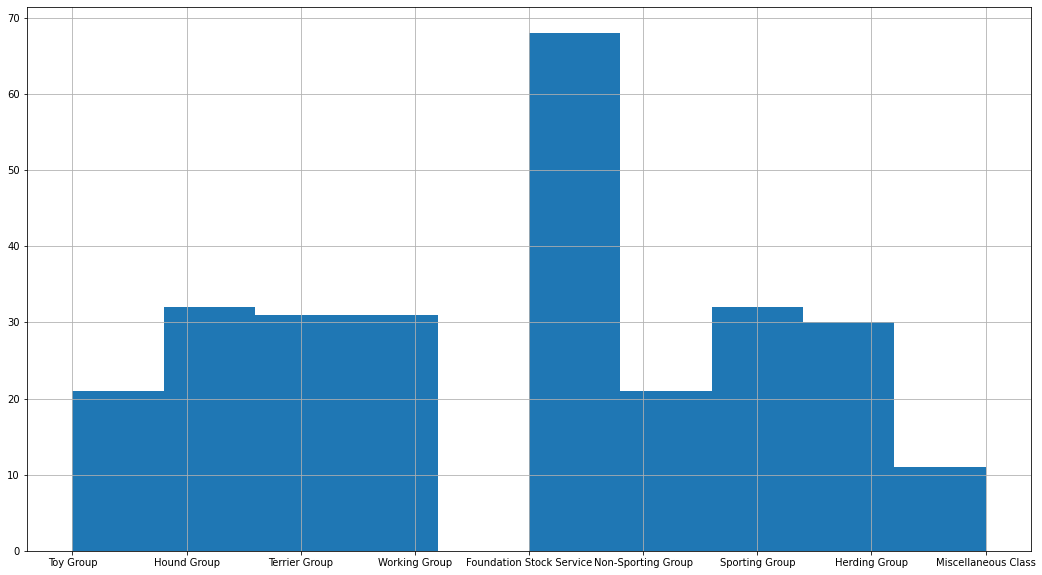

In [67]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv')

dataset = data.dropna()

data['group'].hist(figsize=[18, 10], xlabelsize=10,)

**Questão 1 (1,0 ponto)** É possível extrair tarefas de classificação ou de regressão dessa base? Que variáveis poderiam ser alvos nessas tarefas e quais seriam os atributos/variáveis independentes? **Ainda não vimos processamento de linguagem, então podem desconsiderar a variável description**.

In [3]:
# possible targets: 
#   popularity (predictable by regression)
#   group (predictable by classification)

# Pode-se, a partir dos dados apresentados, construir tanto um modelo de 
# classificação quanto um modelo de regressão, a depender das variáveis alvo, 
# que podem ser popularity ou group, respectivamente, modeláveis por regressão 
# ou por classificação.

# O problema de que combinação de variáveis independentes determina o modelo 
# mais eficiente é melhor resolvido após experimentação, de modo que, com o 
# tratamento adequado dos dados, todas as outras variáveis no dataset podem vir 
# a ser atributos de um modelo de regressão ou de classificação.

**Questão 2 (1,0 ponto)** Como você trataria as variáveis categóricas nessas tarefas? Faça esse tratamento e mostre a DataFrame resultante.

In [4]:
# one-hot encoding
from pandas import get_dummies

categorical_columns = ['grooming_frequency_category', 
                       'shedding_category', 'energy_level_category',
                       'trainability_category', 'demeanor_category']
categorical_data = dataset[categorical_columns]

dummies = get_dummies(categorical_data)
dummies


,grooming_frequency_category_2-3 Times a Week Brushing,grooming_frequency_category_Daily Brushing,grooming_frequency_category_Occasional Bath/Brush,grooming_frequency_category_Specialty/Professional,grooming_frequency_category_Weekly Brushing,shedding_category_Frequent,shedding_category_Infrequent,shedding_category_Occasional,shedding_category_Regularly,shedding_category_Seasonal,energy_level_category_Calm,energy_level_category_Couch Potato,energy_level_category_Energetic,energy_level_category_Needs Lots of Activity,energy_level_category_Regular Exercise,trainability_category_Agreeable,trainability_category_Eager to Please,trainability_category_Easy Training,trainability_category_Independent,trainability_category_May be Stubborn,demeanor_category_Alert/Responsive,demeanor_category_Aloof/Wary,demeanor_category_Friendly,demeanor_category_Outgoing,demeanor_category_Reserved with Strangers
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
271,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
272,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
274,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


**Questão 3 (1,0 ponto)** As variáveis tem escalas diferentes. Como você trataria essa situação para não prejudicar o desempenho de modelos que são sensíveis a isso? Faça esse tratamento e mostre a DataFrame resultante.

In [5]:
# normalização
from sklearn.preprocessing import normalize

numerical_columns = []
for column in dataset.columns:
  if (dataset[column].dtype == 'float64'):
    numerical_columns.append(column)
numerical_data = dataset[numerical_columns]

normalized_data = normalize(numerical_data)
normalized_data = pd.DataFrame(normalized_data)
normalized_data.columns = numerical_columns
normalized_data


,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,0.542111,0.692698,0.075297,0.107567,0.284573,0.355716,0.014229,0.014229,0.014229,0.018972,0.023714
1,0.623842,0.673749,0.222811,0.267373,0.117891,0.147364,0.007859,0.001965,0.007859,0.001965,0.001965
2,0.627489,0.627489,0.243602,0.341042,0.118151,0.150374,0.006445,0.004296,0.006445,0.010741,0.008593
3,0.524050,0.611392,0.272955,0.506917,0.085966,0.111756,0.006877,0.005158,0.006877,0.008597,0.005158
4,0.573210,0.623054,0.333794,0.378300,0.098119,0.137366,0.005887,0.005887,0.007849,0.003925,0.007849
...,...,...,...,...,...,...,...,...,...,...,...
183,0.654715,0.654715,0.116919,0.140303,0.206209,0.257762,0.006874,0.003437,0.010310,0.010310,0.010310
184,0.570527,0.684633,0.178298,0.356596,0.134770,0.168463,0.004492,0.006739,0.011231,0.006739,0.006739
185,0.587436,0.683065,0.219567,0.317152,0.129083,0.150597,0.002151,0.006454,0.008606,0.006454,0.006454
186,0.352389,0.810494,0.062929,0.346112,0.180356,0.249724,0.002775,0.002775,0.011099,0.008324,0.008324


**Questão 4 (1,5 ponto)** Suponha uma tarefa que envolva predizer a popularidade de uma raça. Essa é uma tarefa de regressão ou de classificação? Selecione atributos para usar como variáveis independentes nessa tarefa. Faça uma análise de importância das variáveis realizando testes de coeficientes do ajuste linear e usando os valores de importância dados por um modelo de árvore de decisão. Note que alguns valores podem estar faltando para certas raças. **Pode usar bibliotecas relevantes. Não é necessário implementar do zero**.

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import hstack, delete

# we have previously preprocessed the data (normalizing the numerical columns 
# and making one-hot encoding in categorical columns) so we just need to concatenate
# this data into X
X = hstack([dummies, normalized_data])

# in order to achieve a successful prediction we need to preprocess the target variable
modes = dataset['popularity'].mode()
dataset['popularity'].iloc[14] = modes[0]
dataset['popularity'].iloc[15] = modes[1]
y = normalize([pd.to_numeric(dataset['popularity'])])[0]

# to evaluate each coefficient's significance we can use the entire dataset to
# gain a wider insight about the relationship between the target and the features
model = DecisionTreeRegressor()
model.fit(X, y)
importances = model.feature_importances_

# now we can enumerate these importances to have a notion about it
for i, j in enumerate(importances):
  print("Feature: ", i, " Importance: ", j)

# we can easily see that the features 3, 6, 10, 11 and 21 have importance 0
# in the prediction task, so we discard these columns from our feature vector X
X = delete(X, [1, 3, 5, 11, 23], axis=1)

# now we rebuild our model using the selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
model = LinearRegression().fit(X_train, y_train)

# next we're gonna evaluate our model
kfolds = KFold(n_splits=8, random_state=17, shuffle=True)
validation = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

Feature:  0  Importance:  0.014448979420258279
Feature:  1  Importance:  1.4618249600442189e-05
Feature:  2  Importance:  0.0006611946742355088
Feature:  3  Importance:  0.0
Feature:  4  Importance:  0.0
Feature:  5  Importance:  4.132466713971983e-05
Feature:  6  Importance:  8.433605539241909e-07
Feature:  7  Importance:  1.686721107748518e-06
Feature:  8  Importance:  0.044581450335259655
Feature:  9  Importance:  0.0012258245650527137
Feature:  10  Importance:  0.0
Feature:  11  Importance:  0.0
Feature:  12  Importance:  0.0022989607098279825
Feature:  13  Importance:  0.0
Feature:  14  Importance:  0.00093149173175144
Feature:  15  Importance:  2.4457456062288167e-05
Feature:  16  Importance:  0.07297176567858614
Feature:  17  Importance:  7.590244984844791e-06
Feature:  18  Importance:  0.0010563090937244846
Feature:  19  Importance:  0.0
Feature:  20  Importance:  0.023542757914893873
Feature:  21  Importance:  0.0001652986685588772
Feature:  22  Importance:  0.0039782722927057

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#-------------------------------------------------------------------------------
# ENUMERAÇÃO DOS MODELOS ESTUDADOS:
#-------------------------------------------------------------------------------
#   Bayes Ótimo
#       Utiliza de manipulações sobre o Teorema de Bayes para chegar a
#       uma estimativa de Yi dadas as variáveis independentes Xi.
#       
#   Modelos Lineares
#       Assume uma relação linear entre as entradas Xi e a variável 
#       alvo Yi, de modo que um modelo linear pode ser representado por
#       coeficientes reais Bi (vetor beta), sendo Yi = Sum((Xi)(Bi))
#
#   K-Vizinhos mais Próximos
#       Considera que observações Xi mais próximas são mais semelhantes
#       do que observações mais distantes entre si, determinando 
#       vizinhanças que delimitam regiões Yi, com base nas K observações
#       mais próximas de cada observação Xi
#
#   Árvores de Decisão
#       Estabelece as classes Yi por meio da discriminação das 
#       observações Xi, ramificando cada possível valor de Yi
#       em condições sobre X
#
#   Máquinas de Vetor Suporte
#       Modelos que dividem as classes Yi utilizando hiperplanos, sejam
#       lineares ou não, e sendo ajustável por meio da função de kernel
#
#   Redes Neurais
#       Baseadas em camadas de neurônios artificiais, Redes Neurais 
#       Artificiais modelam cada um de seus neurônios como uma função 
#       de ativação alimentada por uma combinação linear do vetor de 
#       entradas X, onde cada camada funciona como a entrada da 
#       camada seguinte


#-------------------------------------------------------------------------------
# Métricas de Avaliação de Classificadores
#-------------------------------------------------------------------------------
#   Matriz de Confusão

**Questão 5 (2,0 pontos)** Faça uma avaliação de desempenho dos modelos que vimos até agora no curso, considerando a tarefa de predizer a popularidade da raça e usando validação cruzada.

In [30]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# target and attributes
y = normalize([pd.to_numeric(dataset['popularity'])])[0]
X = hstack([normalized_data, dummies])
# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [27]:
# Linear Regression

model = LinearRegression().fit(X_train, y_train)
validation = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

MEAN SQUARED ERROR:  -0.0013430994678631009


In [39]:
# Ridge Regression

model = Ridge().fit(X_train, y_train)
validation_ridge = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

MEAN SQUARED ERROR:  -0.0013449931434107503


In [40]:
# Lasso Regression

model = Lasso().fit(X_train, y_train)
validation_lasso = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

MEAN SQUARED ERROR:  -0.0013711294707017673


In [41]:
# Elastic Net Regression

model = ElasticNet().fit(X_train, y_train)
validation_elasticnet = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

MEAN SQUARED ERROR:  -0.0013711294707017673


In [44]:
# Neural Network
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(X_train, y_train)
validation_neuralnetwork = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print("MEAN SQUARED ERROR: ", validation.mean())

MEAN SQUARED ERROR:  -0.01300085525892227


In [ ]:
# Como podemos ver, o modelo que se saiu pior foi o Multilayer Perceptron,
# ainda assim todos os modelos estão na mesma faixa de erro, isto é, o RMSE é 
# aproximadamente igual a 0.013
# 

**Questão 6 (1,5 pontos)** Suponha uma tarefa que envolva predizer o grupo de uma raça. Essa é uma tarefa de regressão ou de classificação? Selecione variáveis para usar como atributos nessa tarefa. Faça uma análise de importância das variáveis realizando testes de coeficientes do ajuste linear e usando os valores de importância dados por um modelo de árvore de decisão. **Pode usar bibliotecas relevantes. Não é necessário implementar do zero**. Nota: as classes _Foundation Stock Service_ e _Miscellaneous Class_ são classes não-descritivas e podem ser desconsideradas.

In [106]:
# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from numpy import hstack
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from numpy import array

# target and attributes of the task
y = dataset['group']
X = pd.DataFrame(hstack([normalized_data, dummies]))

# feature selection by decision tree importances
model = DecisionTreeClassifier()
model.fit(X, y)
importances = model.feature_importances_
print(importances)
X.drop([12, 14, 16, 17, 20, 21, 22,28, 29, 30, 31, 32, 34], axis=1, inplace=True)

# training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

# the model
GaussianNaiveBayesClassifier = GaussianNB().fit(X_train, y_train)

# model evaluation
preds = GaussianNaiveBayesClassifier.predict(X_test)
print("Gaussian Naive Bayes Classifier Evaluation:\n")
print("\tScore: ", GaussianNaiveBayesClassifier.score(X, y)*100, "%")
print("\tAccuracy: ", accuracy_score(y_test, preds)*100, "%")

# WITH THE WHOLE DATASET
#   Score:  0.4095744680851064
#   Accuracy:  0.23404255319148937

# WITH SELECTED FEATURES
# Score:  50.53191489361703 %
# Accuracy:  31.914893617021278 %


# even though our model didn't performed very well, we can see that a subtle
# adjustment on the inputs (we deleted the features where importance=0) 
# increased the metrics we used to evaluate the model


[0.06480895 0.02848809 0.00415451 0.16832701 0.04618928 0.12735114
 0.06566224 0.08202725 0.05966748 0.09286502 0.08921494 0.01931049
 0.         0.00623177 0.         0.         0.         0.01454079
 0.01626734 0.0149929  0.         0.         0.         0.02624762
 0.00623177 0.00934765 0.00997083 0.01968052 0.         0.
 0.         0.         0.         0.01723438 0.         0.01118803]
Gaussian Naive Bayes Classifier Evaluation:

	Score:  50.53191489361703 %
	Accuracy:  31.914893617021278 %


**Questão 7 (2,0 ponto)** Faça uma avaliação de desempenho dos modelos que vimos até agora no curso, considerando a tarefa de predizer o grupo da raça e usando validação cruzada. Avalie acurácia e precisão e cobertura por classe. Mostre a matriz de confusão do melhor de todos os modelos ajustados durante a validação cruzada.

In [122]:
# Naive Bayes Classifier
from sklearn.metrics import precision_score

print("Accuracy: ", accuracy_score(y_test, preds)*100, "%")
print("Precision: ", precision_score(y_test, preds, average='macro'))
for i, p in enumerate(precision_score(y_test, preds, average=None)):
  print("Precision ", i, " =", p*100, "%")

Accuracy:  31.914893617021278 %
Precision:  0.4209183673469387
Precision  0  = 25.0 %
Precision  1  = 12.5 %
Precision  2  = 0.0 %
Precision  3  = 0.0 %
Precision  4  = 57.14285714285714 %
Precision  5  = 100.0 %
Precision  6  = 100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# Linear Regression Classifier

# in order to perform a classification task by using linear regression
# we need to fit a model for each label
y_dummies = get_dummies(y)
for y in y_dummies:
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
  model = LinearRegression().fit(X_train, y_train)
  preds = model.predict(X_test)
  print("Model ", i, "\tScore: ", model.score(X, y)*100, "%")
  print("Model ", i, "\tAccuracy: ", accuracy_score(y_test, preds)*100, "%")

ValueError: ignored